In [1]:
import json
import requests
import pandas as pd
req = requests.get("https://api.openweathermap.org/data/2.5/forecast?q=bhopal"
                           "&appid=ef831cc525f939c8eb6824aa48c69c82")

import matplotlib.pyplot as plt
text_data= req.text
json_dict= json.loads(text_data)

df = pd.DataFrame.from_dict(json_dict["list"])
df.to_excel("output.xlsx")


In [2]:
df=df.drop('rain',axis=1).copy()

In [3]:
df[['temp']] =df.main.str.split("t",expand=True,)
#,'feels_like','temp_min','temp_max','pressure','sea_level','grnd_level','humidity','temp_kf'

In [4]:
df['main'][0]

{'temp': 304.62,
 'feels_like': 305.94,
 'temp_min': 303.2,
 'temp_max': 304.62,
 'pressure': 1004,
 'sea_level': 1004,
 'grnd_level': 949,
 'humidity': 47,
 'temp_kf': 1.42}

In [5]:
main=df.main
weather=df.weather
dt_txt=df.dt_txt
df2=pd.DataFrame(main)
data_dict = {"feels_like":[],"temp_min":[],"temp_max":[],'temp':[],"humidity":[],"dt_txt":[],'cloud':[],'type':[]}
for t in dt_txt:
    data_dict["dt_txt"].append(t)
for i in main:
    data_dict['feels_like'].append(i['feels_like']- 273.15 )
    data_dict['temp_min'].append(i['temp_min']- 273.15 )
    data_dict['temp_max'].append(i['temp_max']- 273.15 )
    data_dict['temp'].append(i['temp']- 273.15 )
    data_dict['humidity'].append(i['humidity'])
for w in weather:
    data_dict['cloud'].append(w[0]['main'])
    data_dict['type'].append(w[0]['description'])
new_df=pd.DataFrame(data_dict)
new_df


,feels_like,temp_min,temp_max,temp,humidity,dt_txt,cloud,type
0,32.79,30.05,31.47,31.47,47,2021-06-07 18:00:00,Clouds,few clouds
1,31.56,28.77,29.91,29.91,54,2021-06-07 21:00:00,Clouds,scattered clouds
2,30.02,28.22,28.22,28.22,62,2021-06-08 00:00:00,Rain,light rain
3,33.29,31.40,31.40,31.40,50,2021-06-08 03:00:00,Clear,clear sky
4,37.98,36.43,36.43,36.43,34,2021-06-08 06:00:00,Clear,clear sky
5,38.48,37.81,37.81,37.81,28,2021-06-08 09:00:00,Clouds,scattered clouds
6,34.70,33.57,33.57,33.57,40,2021-06-08 12:00:00,Rain,light rain
7,30.78,29.31,29.31,29.31,55,2021-06-08 15:00:00,Rain,moderate rain
8,30.98,29.54,29.54,29.54,54,2021-06-08 18:00:00,Rain,light rain
9,29.95,28.10,28.10,28.10,63,2021-06-08 21:00:00,Clouds,scattered clouds


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="darkgrid")

# sns.displot(
#     df, x=wind_speed, col=cloud_type,
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),)
# plt.xlabel("wind speed(m/s)")

# speed=m/s,temp=kelvin


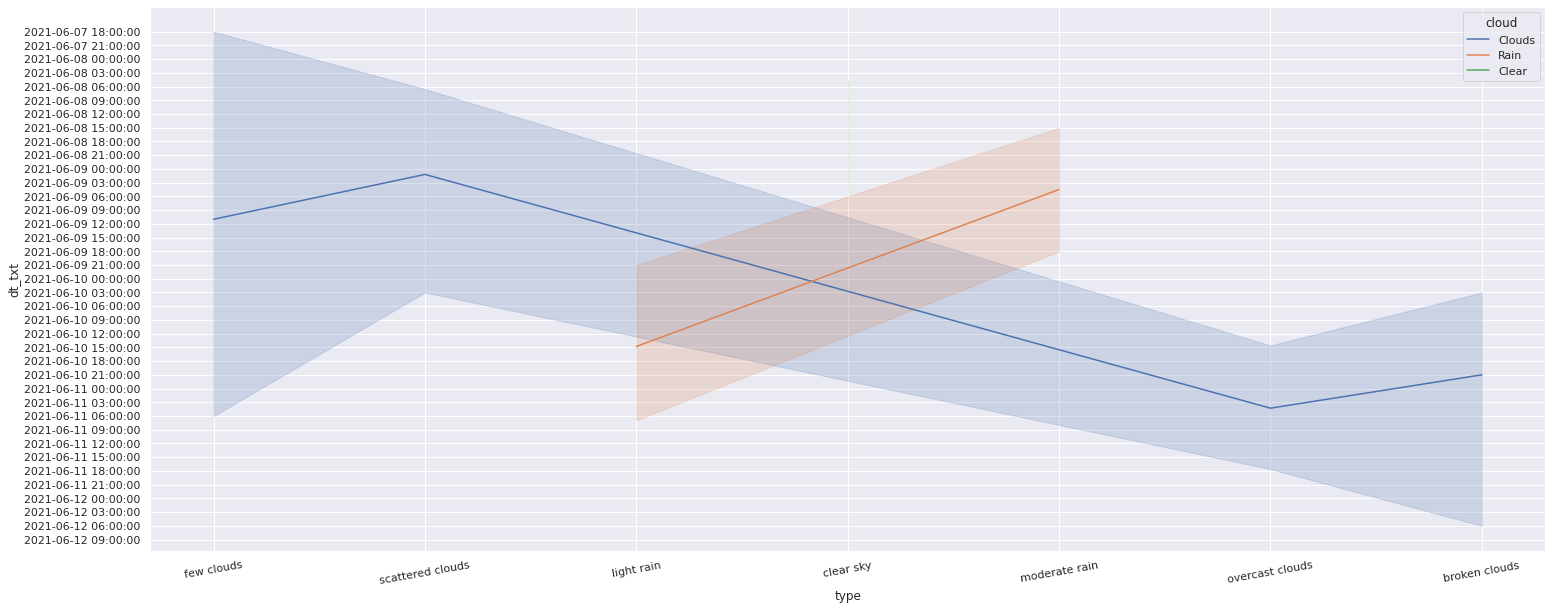

In [7]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(25,10),)
plot=sns.lineplot(x="type", y="dt_txt",hue='cloud',
             data=new_df)
plt.setp(plot.get_xticklabels(), rotation=10)
plt.show()

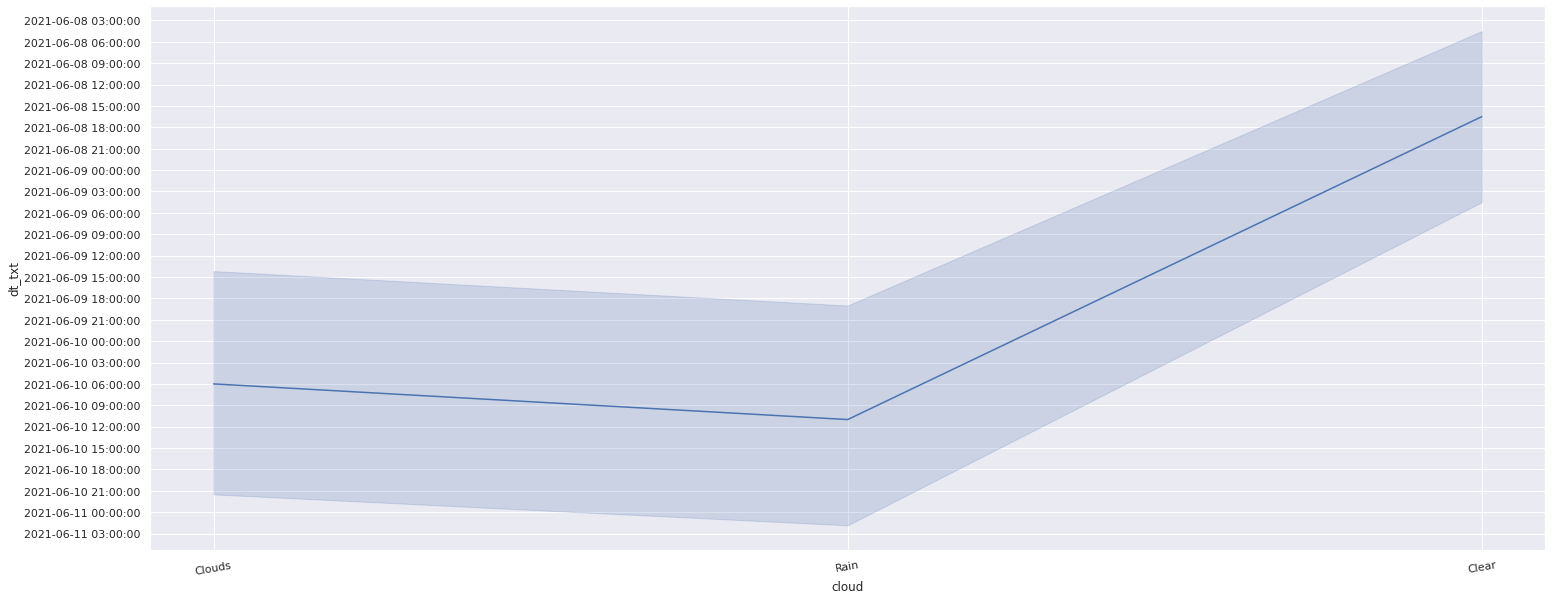

In [8]:

sns.set_theme(style="darkgrid")
plt.figure(figsize=(25,10),)
plot=sns.lineplot(x="cloud", y="dt_txt",
             data=new_df)
plt.setp(plot.get_xticklabels(), rotation=10)
plt.show()
#

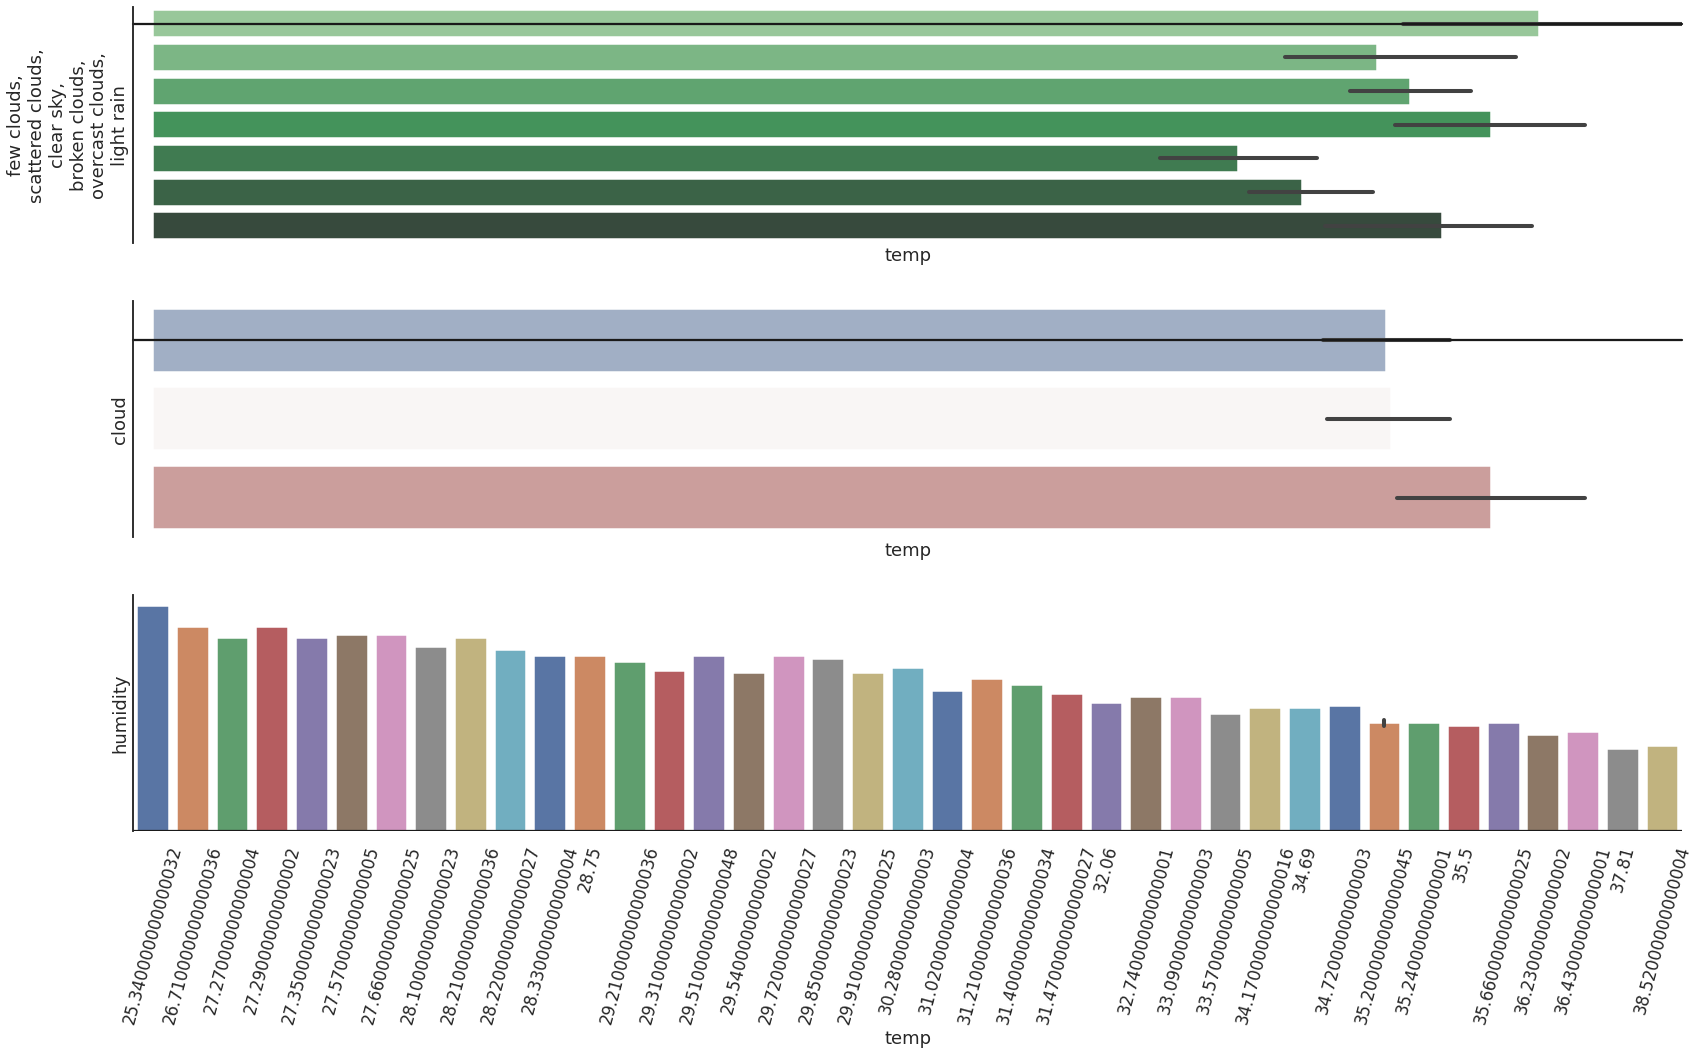

In [9]:
import numpy as np
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24, 15), sharex=True)

# Generate some sequential data
y1 = np.arange(1, 11)
plot1=sns.barplot(x=new_df['temp'], y=new_df['type'], palette="Greens_d", ax=ax1,data=new_df)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("few clouds,\nscattered clouds,\nclear sky,\nbroken clouds,\novercast clouds,\nlight rain")
# Center the data to make it diverging
y2 = y1 - 5.5
plot2=sns.barplot(x=new_df['temp'], y=new_df['cloud'], palette="vlag", ax=ax2,data=new_df)
ax2.axhline(0, color="k", clip_on=False)
# ax2.set_ylabel("cloud")

# Randomly reorder the data to make it qualitative
# y3 = rs.choice(y1, len(y1), replace=False)
plot3=sns.barplot(x=new_df['temp'], y=new_df['humidity'], palette="deep", ax=ax3,data=new_df)
ax3.axhline(0, color="k", )
# ax3.set_ylabel("humidity")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(plot1.get_yticklabels(), rotation=180)
plt.setp(plot1.get_xticklabels(), rotation=75)
plt.setp(plot2.get_xticklabels(), rotation=75)
plt.setp(plot3.get_xticklabels(), rotation=75)

plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()
